In [52]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math

In [53]:
n = np.arange(0,64,1)
x = (0.5)**n

In [54]:
x

array([  1.00000000e+00,   5.00000000e-01,   2.50000000e-01,
         1.25000000e-01,   6.25000000e-02,   3.12500000e-02,
         1.56250000e-02,   7.81250000e-03,   3.90625000e-03,
         1.95312500e-03,   9.76562500e-04,   4.88281250e-04,
         2.44140625e-04,   1.22070312e-04,   6.10351562e-05,
         3.05175781e-05,   1.52587891e-05,   7.62939453e-06,
         3.81469727e-06,   1.90734863e-06,   9.53674316e-07,
         4.76837158e-07,   2.38418579e-07,   1.19209290e-07,
         5.96046448e-08,   2.98023224e-08,   1.49011612e-08,
         7.45058060e-09,   3.72529030e-09,   1.86264515e-09,
         9.31322575e-10,   4.65661287e-10,   2.32830644e-10,
         1.16415322e-10,   5.82076609e-11,   2.91038305e-11,
         1.45519152e-11,   7.27595761e-12,   3.63797881e-12,
         1.81898940e-12,   9.09494702e-13,   4.54747351e-13,
         2.27373675e-13,   1.13686838e-13,   5.68434189e-14,
         2.84217094e-14,   1.42108547e-14,   7.10542736e-15,
         3.55271368e-15,

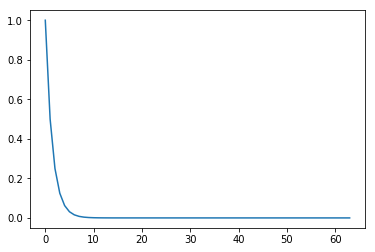

In [55]:
plt.plot(x)
plt.show()

In [56]:
import cmath
def dft(N):
    W = np.ndarray((N,N),dtype = complex)
    for i in range(N):
        for j in range(N):
            W[i][j] = cmath.exp(complex(0,float(-2*math.pi/N*i*j)))
    return W
Y = dft(64)

In [57]:
X = x.transpose()
z = np.matmul(Y,X)

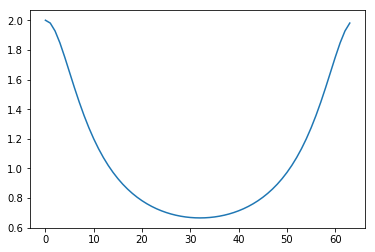

In [58]:
plt.plot(abs(z))
plt.show()

In [59]:
def haarMatrix(n, normalized=True):
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return h
A = haarMatrix(64)

In [60]:
b = np.matmul(A,X)

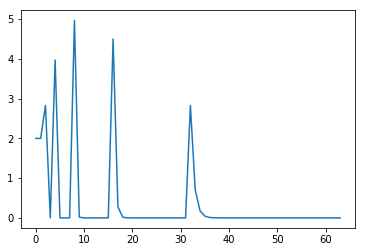

In [61]:
plt.plot(b)
plt.show()

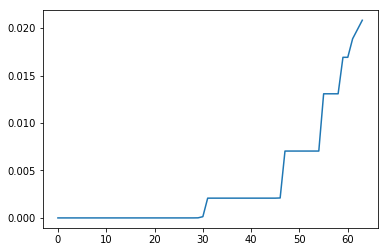

In [62]:
from numpy.linalg import inv
El = []
for L in range(1,65):
    bm = []
    sum = 0
    for i in range(64-L):
        bm.append(b[i])
    for i in range(64-L,64):
        bm.append(0)
    xm = np.matmul(inv(A),bm)
    for i in range(len(X)):
        sum = sum + ((X[i]-xm[i])**2)
        q = sum/64
    El.append(q)
plt.plot(El)
plt.show()

In [63]:
Dl = []
L = np.arange(1,64,1)
for j in range(len(L)):
    zm = []
    sum = 0
    for i in range(math.floor((65-L[j])/2)):
        zm.append(z[i])
    for i in range(math.floor((65-L[j])/2),math.ceil((65+L[j])/2)):
        zm.append(0)
    for i in range(math.ceil((65+L[j])/2),64):
        zm.append(z[i])
    dm = np.matmul(inv(Y),zm)
    for i in range(len(X)):
        sum = sum + ((abs(X[i]-dm[i]))**2)
        q = sum/64
    Dl.append(q)

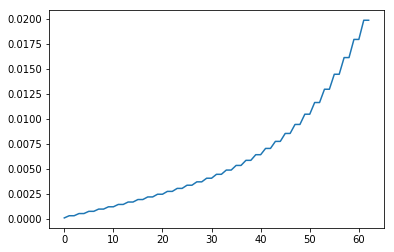

In [64]:
plt.plot(Dl)
plt.show()

In [65]:
from scipy.fftpack import dct,idct
c = dct(X)

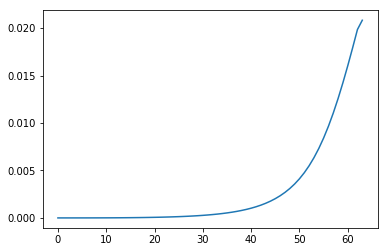

In [66]:
Cl = []
for L in range(1,65):
    cm = []
    sum = 0
    for i in range(64-L):
        cm.append(c[i])
    for i in range(64-L,64):
        cm.append(0)
    xm = idct(cm)/128
    for i in range(len(X)):
        sum = sum + ((X[i]-xm[i])**2)
        q = sum/64
    Cl.append(q)
plt.plot(Cl)
plt.show()

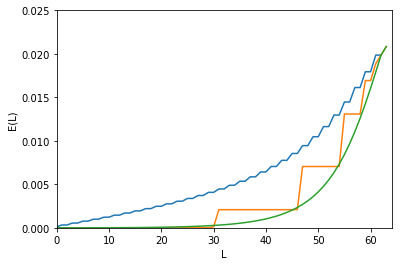

In [69]:
plt.plot(Dl)
plt.plot(El)
plt.plot(Cl)
plt.axis([0, 64, 0, 0.025])
plt.ylabel('E(L)')
plt.xlabel('L')
plt.show()